In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Trabalhando DataFrame dos Videos 

In [2]:
Dvideo = pd.read_csv('bioensaio/larvas.csv', index_col='Unnamed: 0')
rep=lambda x: x.split("_")[2].split(".")[0]
Dvideo["Repetition"]=Dvideo["video"].apply(rep)
Dvideo

,Conc,video,media_euclidiana,media_cossenos,tamanho_video,concentracao,media_euclidiana_dividida,media_cossenos_dividida,n_larvas,Repetition
0,0.00,C_0_3.mp4,11597.527592,0.015915,2073600,0,0.005593,7.674910e-09,6,3
1,0.79,C_5_1.mp4,10592.189822,0.036566,437220,5,0.024226,8.363282e-08,18,1
2,1.59,C_10_1.mp4,8439.760857,0.066519,246000,10,0.034308,2.704043e-07,19,1
3,2.07,C_13_2.mp4,17738.159115,0.073165,884256,13,0.020060,8.274208e-08,21,2
4,2.38,C_15_1.mp4,19102.249627,0.079536,921312,15,0.020734,8.632891e-08,19,1
5,2.86,C_18_2.mp4,5946.028144,0.034391,307584,18,0.019331,1.118114e-07,7,2
6,3.18,C_20_3.mp4,5611.194800,0.024549,285012,20,0.019688,8.613466e-08,6,3
7,3.98,C_25_2.mp4,5091.617378,0.024123,303260,25,0.016790,7.954464e-08,7,2
8,3.98,C_25_3.mp4,11779.217750,0.047033,786760,25,0.014972,5.978003e-08,17,3
9,4.77,C_30_3.mp4,3797.917642,0.017284,243900,30,0.015572,7.086479e-08,3,3


In [3]:
videofiltred = Dvideo[['Conc','Repetition','media_euclidiana_dividida','media_cossenos_dividida','n_larvas']]
videofiltred

,Conc,Repetition,media_euclidiana_dividida,media_cossenos_dividida,n_larvas
0,0.00,3,0.005593,7.674910e-09,6
1,0.79,1,0.024226,8.363282e-08,18
2,1.59,1,0.034308,2.704043e-07,19
3,2.07,2,0.020060,8.274208e-08,21
4,2.38,1,0.020734,8.632891e-08,19
5,2.86,2,0.019331,1.118114e-07,7
6,3.18,3,0.019688,8.613466e-08,6
7,3.98,2,0.016790,7.954464e-08,7
8,3.98,3,0.014972,5.978003e-08,17
9,4.77,3,0.015572,7.086479e-08,3


In [4]:
DfVideo = videofiltred.groupby(['Conc']).mean().reset_index()
DfVideo['euclidiana/larva']=DfVideo['media_euclidiana_dividida']/DfVideo['n_larvas']
DfVideo['cossernos/larva']=DfVideo['media_cossenos_dividida']/DfVideo['n_larvas']
DfVideo = DfVideo[['Conc','n_larvas','euclidiana/larva','cossernos/larva']]
DfVideo

,Conc,n_larvas,euclidiana/larva,cossernos/larva
0,0.00,6.0,0.000932,1.279152e-09
1,0.79,18.0,0.001346,4.646268e-09
2,1.59,19.0,0.001806,1.423180e-08
3,2.07,21.0,0.000955,3.940099e-09
4,2.38,19.0,0.001091,4.543627e-09
5,2.86,7.0,0.002762,1.597306e-08
6,3.18,6.0,0.003281,1.435578e-08
7,3.98,12.0,0.001323,5.805195e-09
8,4.77,3.0,0.005191,2.362160e-08


In [5]:
DfVideo.to_csv('bioensaio/dataVideos.csv')

# Trabalhando DataFrame dos Bioensaios

# # trabalhando dados de pupa

In [13]:
pupadf = pd.read_excel('bioensaio/volumeElipsoid.xlsx', index_col='Unnamed: 0')
pupadf=pupadf.dropna()
pupadf

,conc,volume_elipsoide
0,0,98.024520
1,0,119.370240
2,0,99.164340
3,0,91.101867
4,0,94.317227
...,...,...
593,30,68.659240
594,30,62.567640
595,30,82.479427
596,30,64.826347


In [14]:
pupadf_mean=pupadf.groupby(['conc']).mean().reset_index()
pupadf_mean

,conc,volume_elipsoide
0,0,101.067285
1,5,104.852842
2,8,104.125749
3,10,107.298545
4,13,106.151833
5,15,107.597002
6,18,69.401983
7,20,69.987336
8,25,61.975541
9,30,66.613941


In [15]:
pupadf_sd=pupadf.groupby(['conc']).std().reset_index()
pupadf_sd 

,conc,volume_elipsoide
0,0,12.029746
1,5,17.705610
2,8,21.345623
3,10,21.488558
4,13,15.940065
5,15,18.440247
6,18,13.555515
7,20,13.961823
8,25,13.131152
9,30,15.696232


In [16]:
pupadf_mean['volume_std'] = pupadf_sd['volume_elipsoide']
pupadf_mean

,conc,volume_elipsoide,volume_std
0,0,101.067285,12.029746
1,5,104.852842,17.705610
2,8,104.125749,21.345623
3,10,107.298545,21.488558
4,13,106.151833,15.940065
5,15,107.597002,18.440247
6,18,69.401983,13.555515
7,20,69.987336,13.961823
8,25,61.975541,13.131152
9,30,66.613941,15.696232


In [18]:
pupadf_mean.to_csv('bioensaio/dataVolumeElipsoide.csv')

# #trabalhando dados de ensaio

In [20]:
data2 = pd.read_excel('bioensaio/Physiological.xlsx')
data2.head(10)

,conc,Repetition,total_pupae_48h,total_tested_larvae,PR-pupation_rate,total_control_adults,total_emerged_adults,EIR-emergence_inhibition_rate,total_deformed_adults,adult_hatchingDeath_Anddeformed
0,30,1,12,20,0.60,20,17,0.15,14,0.823529
1,25,1,4,20,0.20,20,12,0.40,12,1.000000
2,20,1,16,20,0.80,20,19,0.05,12,0.631579
3,18,1,16,20,0.80,20,19,0.05,11,0.578947
4,15,1,1,20,0.05,20,20,0.00,3,0.150000
5,13,1,2,20,0.10,20,20,0.00,0,0.000000
6,10,1,1,20,0.05,20,18,0.10,0,0.000000
7,8,1,3,20,0.15,20,19,0.05,2,0.105263
8,5,1,2,20,0.10,20,20,0.00,0,0.000000
9,0,1,18,20,0.90,20,20,0.00,0,0.000000


In [22]:
data2 = pd.read_excel('bioensaio/Physiological.xlsx')
datafisio = data2[['conc','PR-pupation_rate','EIR-emergence_inhibition_rate','adult_hatchingDeath_Anddeformed']]
datafisio_sd = datafisio.groupby(['conc']).std().reset_index()
datafisio=datafisio.groupby(['conc']).mean().reset_index()
datafisio['PR-pupation_rate_std'] = datafisio_sd['PR-pupation_rate']
datafisio['EIR-emergence_inhibition_rate_std'] = datafisio_sd['EIR-emergence_inhibition_rate']
datafisio['adult_death_deformity_std'] = datafisio_sd['adult_hatchingDeath_Anddeformed']
datafisio

,conc,PR-pupation_rate,EIR-emergence_inhibition_rate,adult_hatchingDeath_Anddeformed,PR-pupation_rate_std,EIR-emergence_inhibition_rate_std,adult_death_deformity_std
0,0,0.783333,0.000000,0.016667,0.104083,0.000000,0.028868
1,5,0.150000,0.033333,0.017544,0.132288,0.028868,0.030387
2,8,0.233333,0.016667,0.051754,0.076376,0.028868,0.052654
3,10,0.183333,0.066667,0.055556,0.115470,0.057735,0.096225
4,13,0.100000,0.000000,0.130952,0.100000,0.000000,0.125424
5,15,0.300000,0.000000,0.133333,0.229129,0.000000,0.028868
6,18,0.700000,0.033333,0.451754,0.086603,0.028868,0.176695
7,20,0.583333,0.033333,0.378947,0.292973,0.028868,0.263789
8,25,0.346825,0.166667,0.716667,0.262600,0.208167,0.256580
9,30,0.466667,0.150000,0.627451,0.368556,0.000000,0.244902


# Concatenando Frames

In [23]:
DfFinal = pd.merge(pupadf_mean, datafisio, on ='conc')
#DfFinal = DfFinal.drop(['Repetition_x','Repetition_y'],axis=1)
DfFinal

,conc,volume_elipsoide,volume_std,PR-pupation_rate,EIR-emergence_inhibition_rate,adult_hatchingDeath_Anddeformed,PR-pupation_rate_std,EIR-emergence_inhibition_rate_std,adult_death_deformity_std
0,0,101.067285,12.029746,0.783333,0.000000,0.016667,0.104083,0.000000,0.028868
1,5,104.852842,17.705610,0.150000,0.033333,0.017544,0.132288,0.028868,0.030387
2,8,104.125749,21.345623,0.233333,0.016667,0.051754,0.076376,0.028868,0.052654
3,10,107.298545,21.488558,0.183333,0.066667,0.055556,0.115470,0.057735,0.096225
4,13,106.151833,15.940065,0.100000,0.000000,0.130952,0.100000,0.000000,0.125424
5,15,107.597002,18.440247,0.300000,0.000000,0.133333,0.229129,0.000000,0.028868
6,18,69.401983,13.555515,0.700000,0.033333,0.451754,0.086603,0.028868,0.176695
7,20,69.987336,13.961823,0.583333,0.033333,0.378947,0.292973,0.028868,0.263789
8,25,61.975541,13.131152,0.346825,0.166667,0.716667,0.262600,0.208167,0.256580
9,30,66.613941,15.696232,0.466667,0.150000,0.627451,0.368556,0.000000,0.244902


In [2]:
data3 = pd.read_excel('bioensaio/mortality_larvas.xlsx')
data3

,conc,time,mortality_larvas
0,0,0,0.0
1,0,0,0.0
2,0,0,0.0
3,0,12,0.0
4,0,12,0.0
...,...,...,...
160,25,84,0.0
161,25,84,0.0
162,30,84,0.1
163,30,84,0.0


In [3]:
lmortality_mean=data3.groupby(['conc','time']).mean().reset_index()
lmortality_mean

,conc,time,mortality_larvas
0,0,0,0.000000
1,0,12,0.000000
2,0,24,0.000000
3,0,48,0.000000
4,0,60,0.000000
5,0,72,0.000000
6,0,84,0.000000
7,5,12,0.000000
8,5,24,0.000000
9,5,48,0.000000


In [7]:
lmortality_sd=data3.groupby(['conc','time']).std().reset_index()
lmortality_sd

,conc,time,mortality_larvas
0,0,0,0.000000
1,0,12,0.000000
2,0,24,0.000000
3,0,48,0.000000
4,0,60,0.000000
5,0,72,0.000000
6,0,84,0.000000
7,5,12,0.000000
8,5,24,0.000000
9,5,48,0.000000


In [8]:
lmortality_mean['larva_mortality_std'] = lmortality_sd['mortality_larvas']
lmortality_mean

,conc,time,mortality_larvas,larva_mortality_std
0,0,0,0.000000,0.000000
1,0,12,0.000000,0.000000
2,0,24,0.000000,0.000000
3,0,48,0.000000,0.000000
4,0,60,0.000000,0.000000
5,0,72,0.000000,0.000000
6,0,84,0.000000,0.000000
7,5,12,0.000000,0.000000
8,5,24,0.000000,0.000000
9,5,48,0.000000,0.000000


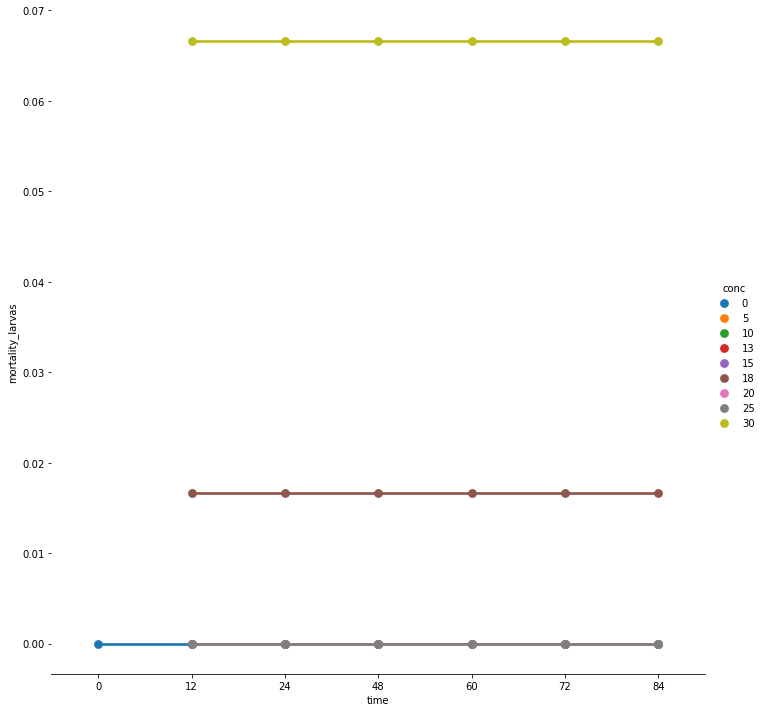

In [9]:
g2 = sns.catplot(x="time", y="mortality_larvas", hue="conc",
                capsize=.1, palette="tab10",
                height=10, aspect=1,
                kind='point',data=lmortality_mean)
g2.despine(left=True)

In [7]:
data4 = pd.read_excel('bioensaio/MortalidadeFumigacao.xlsx')
data4

,conc,time,mortality_adult
0,30,24,1.0
1,30,22,1.0
2,30,3,0.3
3,30,1,0.0
4,30,0,0.0
5,30,24,1.0
6,30,22,0.9
7,30,3,0.4
8,30,1,0.0
9,30,0,0.0


In [45]:
adultfumig_mean=data4.groupby(['conc','time']).mean().reset_index()
adultfumig_mean.head(10)

,conc,time,mortality_adult
0,0,0,0.000000
1,0,1,0.000000
2,0,3,0.000000
3,0,22,0.033333
4,0,24,0.266667
5,10,0,0.000000
6,10,1,0.000000
7,10,3,0.033333
8,10,22,0.933333
9,10,24,0.933333


In [46]:
adultfumig_sd=data4.groupby(['conc','time']).std().reset_index()
adultfumig_sd

,conc,time,mortality_adult
0,0,0,0.000000
1,0,1,0.000000
2,0,3,0.000000
3,0,22,0.057735
4,0,24,0.057735
5,10,0,0.000000
6,10,1,0.000000
7,10,3,0.057735
8,10,22,0.057735
9,10,24,0.057735


In [47]:
adultfumig_mean['AdultFumig_mortality_std'] = adultfumig_sd['mortality_adult']
adultfumig_mean

,conc,time,mortality_adult,AdultFumig_mortality_std
0,0,0,0.000000,0.000000
1,0,1,0.000000,0.000000
2,0,3,0.000000,0.000000
3,0,22,0.033333,0.057735
4,0,24,0.266667,0.057735
5,10,0,0.000000,0.000000
6,10,1,0.000000,0.000000
7,10,3,0.033333,0.057735
8,10,22,0.933333,0.057735
9,10,24,0.933333,0.057735


In [48]:
DfFinal.to_csv('datametamorfose.csv')

In [10]:
lmortality_mean.to_csv('mortalidadelarvas.csv')

In [50]:
adultfumig_mean.to_csv('mortalidadeadultofumigacao.csv')